In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'ref_hash':np.int64, 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'device_os_version':np.float64, 'device_brand':np.float64, 'device_model':np.float64,\
              'device_city':np.float64, 'session_user_agent':np.float64, 'trans_id':'category', 'user_agent':np.float64, \
              'event_uuid':object, 'carrier':np.float64, 'kind':np.float64, 'device_os':'category', 'wifi':'category', 'connection_type':'category',\
              'ip_address':np.int64, 'device_language':np.float64, 'connection_type':'category'}

events = pd.read_csv('data/train_events.csv.gzip', dtype=dtype_list, parse_dates= ['date'])

In [3]:
events.shape

(2494423, 22)

In [4]:
events.head().T

,0,1,2,3,4
date,2019-03-05 00:09:36.966000,2019-03-05 00:09:38.920000,2019-03-05 00:09:26.195000,2019-03-05 00:09:31.107000,2019-03-09 21:00:36.585000
event_id,0,1,0,2,3
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,2688759737656491380,2688759737656491380,2688759737656491380,2688759737656491380,2635154697734164782
application_id,38,38,38,38,38
attributed,False,False,False,False,False
device_countrycode,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
device_os_version,5.9087e+17,5.9087e+17,5.9087e+17,5.9087e+17,7.39184e+18
device_brand,NaN,NaN,NaN,NaN,NaN
device_model,5.99012e+18,5.99012e+18,5.99012e+18,5.99012e+18,5.9609e+18


In [5]:
events.dtypes

date                  datetime64[ns]
event_id                       int16
ref_type                    category
ref_hash                       int64
application_id                 int64
attributed                      bool
device_countrycode          category
device_os_version            float64
device_brand                 float64
device_model                 float64
device_city                  float64
session_user_agent           float64
trans_id                    category
user_agent                   float64
event_uuid                    object
carrier                      float64
kind                         float64
device_os                   category
wifi                        category
connection_type             category
ip_address                     int64
device_language              float64
dtype: object

In [6]:
events['connection_type'].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [7]:
events['attributed'].isnull().sum()

0

In [8]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [9]:
events['wifi'].isnull().sum()

1115551

In [50]:
len(events)

2494423

In [11]:
events['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [12]:
events['device_countrycode'].isnull().sum()

0

In [13]:
#es un único valor para todos los eventos entonces lo guardo en una variable y borro lo columna
device_countrycode = events['device_countrycode'].unique()[0]
device_countrycode

'6333597102633388268'

In [14]:
del events['device_countrycode']

In [15]:
events['event_uuid'].value_counts()

874219f1-82d0-4705-86cc-c73a721d2703    1
abfd1da2-cd44-4844-b7f7-93016d8068ef    1
ae2fce17-8831-4cfd-a9fa-5e5bac33df92    1
97998bc3-f4fc-4f21-991b-4ecc09ac25c7    1
2ddaeffc-adc3-4b5e-bcef-3edb6d582f60    1
accbd216-a793-40ca-8fd3-783550fd1633    1
2b5578db-4e2f-4a15-bc0d-899b690496ee    1
0647c93e-e5ab-44c1-9250-9131f6dbdb29    1
ef9feb02-7bd1-4062-bee9-b3ce1f640e7f    1
18dd97e0-b302-43b4-90a2-f069cfcbed05    1
9d750af0-d332-4af9-92b0-1f49b7155596    1
3d1b349d-66ec-419a-bd44-b8c9af71a25e    1
78a461f2-9ff7-4e13-88d4-3ac38394064f    1
c5d37b7b-a06d-4135-b35d-6a40e8892509    1
23296bdb-2355-4713-afe9-9dcfa5a45240    1
0251ac83-fdb3-4530-bef6-a005ee008034    1
b70310c4-a39b-4b8c-9994-9443729c0529    1
69cdf261-2faa-40b9-bacc-9643d75376df    1
e6e67a42-c71d-454a-87e3-34bc6de28e3d    1
3c3b8684-180e-4af8-9764-ae773aef9de5    1
cb18ad08-2333-4195-8542-ada9c615c91a    1
f984fc79-745d-4ae8-9471-d39a68507d05    1
b3793351-74d2-41ab-af94-90e4e4c2dfdb    1
d4179a20-4e17-4450-a076-8a608fe36c

In [16]:
#son todos valores diferentes, no me dice nada, borro la columna
del events['event_uuid']

In [17]:
events['hour'] = events['date'].dt.hour

In [18]:
events['day'] = events['date'].dt.day

# *Top 10 ciudades*

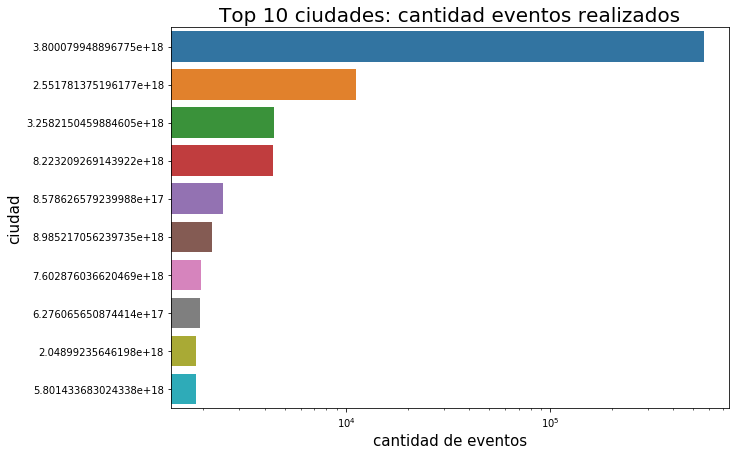

In [110]:
top_city = events['device_city'].value_counts().head(10).index
top_group_city = events.loc[events['device_city'].isin(top_city)]

plt.figure(figsize=(10, 7))
graph_city = sns.countplot(y="device_city", data=top_group_city, log=True, order=top_city)
graph_city.set_title("Top 10 ciudades: cantidad eventos realizados", size=20)
graph_city.set_ylabel("ciudad", size=15)
graph_city.set_xlabel("cantidad de eventos", size=15)

plt.savefig('top10_city.png')

# *Top 5 applicaciones en la ciudad con más eventos*

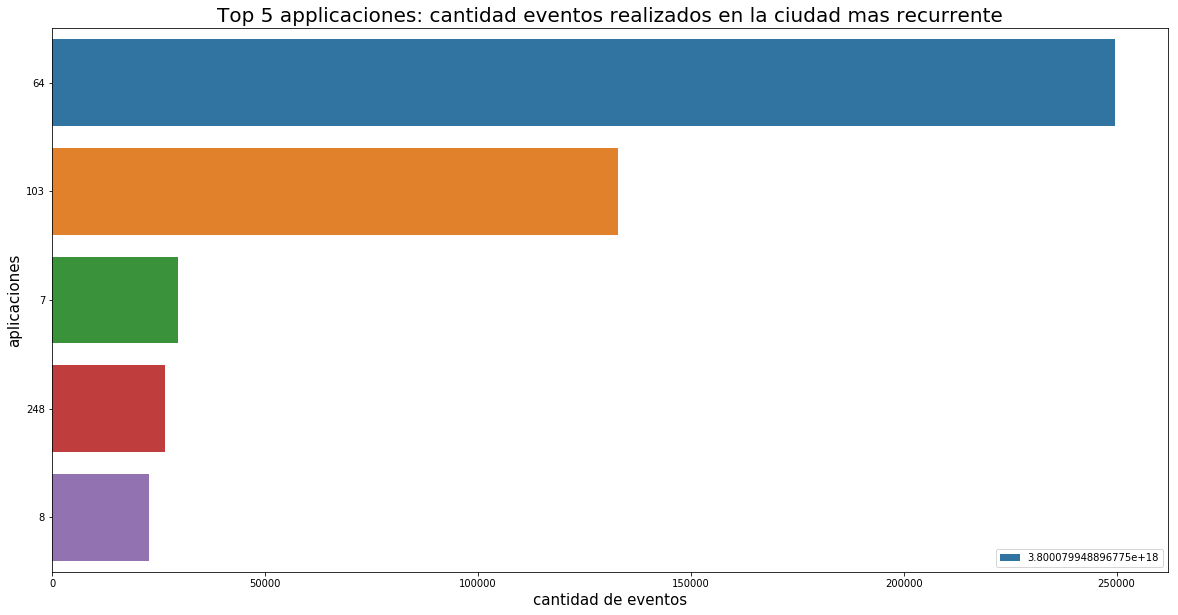

In [112]:
top_city = events['device_city'].value_counts().head(1).index
events_city = events.loc[events['device_city'].isin(top_city), ['application_id']].reset_index()
top_city_app = events_city['application_id'].value_counts().head(5).index
events_city_app = events_city.loc [events_city['application_id'].isin(top_city_app)]

plt.figure(figsize=(20,10))
graph_city_app_events = sns.countplot(y='application_id', data = events_city_app, order=top_city_app)
graph_city_app_events.set_title("Top 5 applicaciones: cantidad eventos realizados en la ciudad mas recurrente", size=20)
graph_city_app_events.set_xlabel("cantidad de eventos", size=15)
graph_city_app_events.set_ylabel("aplicaciones", size=15)
plt.legend(labels=top_city, loc="best")

plt.savefig('top5apps_city.png')

# *Cantidad de eventos atribuidos a jammp por ref_type*

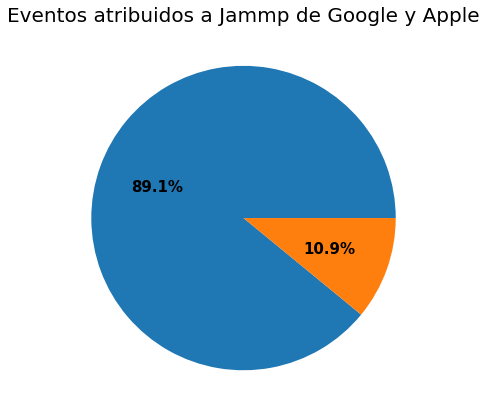

In [21]:
attributed_events = events.loc[events['attributed'] == True, ['ref_type']]
attributed_events_ref_type = attributed_events['ref_type'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
patches, texts, floatt = plt.pie(attributed_events_ref_type, autopct='%1.1f%%')
ax.set_title("Eventos atribuidos a Jammp de Google y Apple", size=20)
plt.setp(floatt, size=15, weight="bold")

plt.savefig('attributed_ref_type')

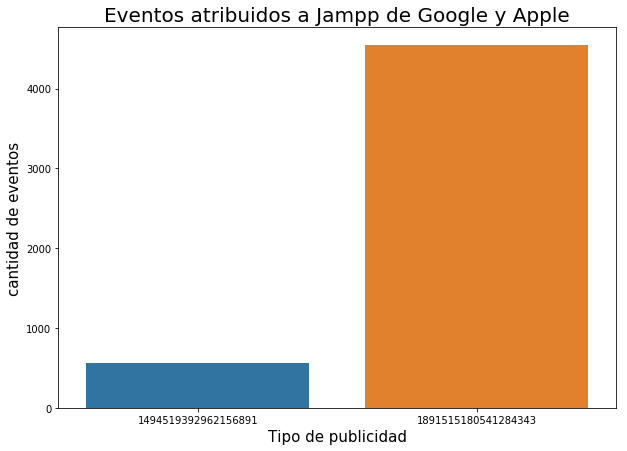

In [113]:
attributed_events = events.loc[events['attributed'] == True, ['ref_type']]

plt.figure(figsize = (10,7))
graph_attributed_events = sns.countplot(x = attributed_events['ref_type'], data = attributed_events)
graph_attributed_events.set_title("Eventos atribuidos a Jampp de Google y Apple", size=20)
graph_attributed_events.set_ylabel("cantidad de eventos", size=15)
graph_attributed_events.set_xlabel("Tipo de publicidad", size=15)

plt.savefig('attributed_ref_type')

# *Cantidad de eventos por hora*

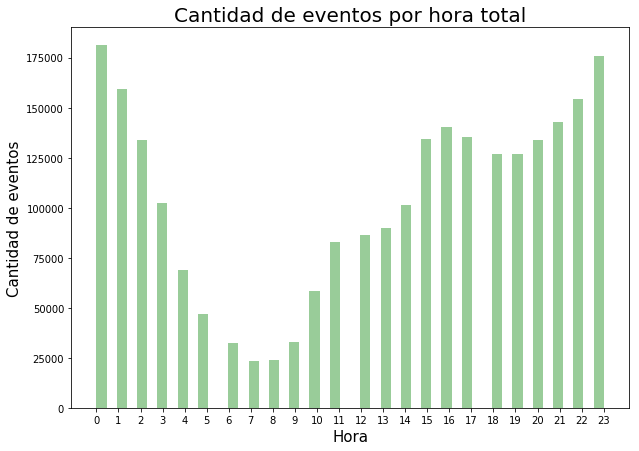

In [115]:
event_for_hour = events.loc[:, ['hour', 'event_id']]

plt.figure(figsize=(10,7))
graph = sns.distplot (event_for_hour['hour'], kde=False, rug=False, label ="Cantidad de eventos por hora",\
                      hist_kws={"color":"g"})
graph.set_title("Cantidad de eventos por hora total", size=20)
graph.set_ylabel("Cantidad de eventos", size=15)
graph.set_xlabel("Hora", size=15)
plt.xticks(np.arange(24),np.arange(24))

plt.savefig('cantidad_eventos_por_hora.png')

# *Top app: cantidad de eventos por hora*

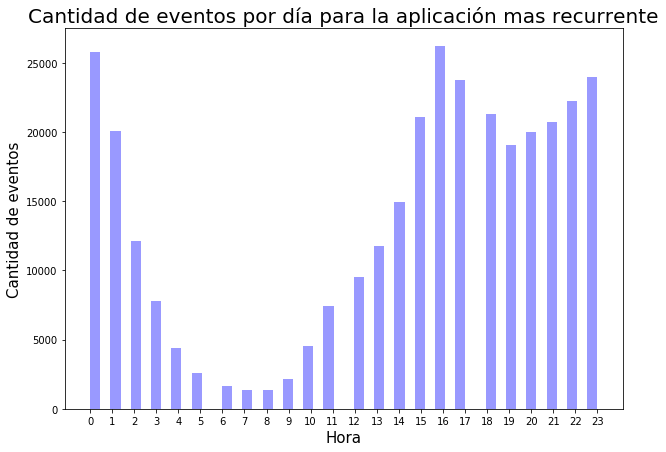

In [130]:
top_apps = events['application_id'].value_counts().head(1).index
events_app = events.loc[events['application_id'].isin(top_apps), ['hour', 'application_id']]

plt.figure(figsize=(10,7))
graph = sns.distplot (events_app['hour'], kde=False, rug=False, label ="Cantidad de eventos por día para app mas usada",\
                      hist_kws={"color":"b"})
graph.set_title("Cantidad de eventos por día para la aplicación mas recurrente", size=20)
graph.set_ylabel("Cantidad de eventos", size=15)
graph.set_xlabel("Hora", size=15)
plt.xticks(np.arange(24),np.arange(24))

plt.savefig('topapp_eventos_por_hora.png')

# *Top apps: comparacion de cantidad de eventos por día*

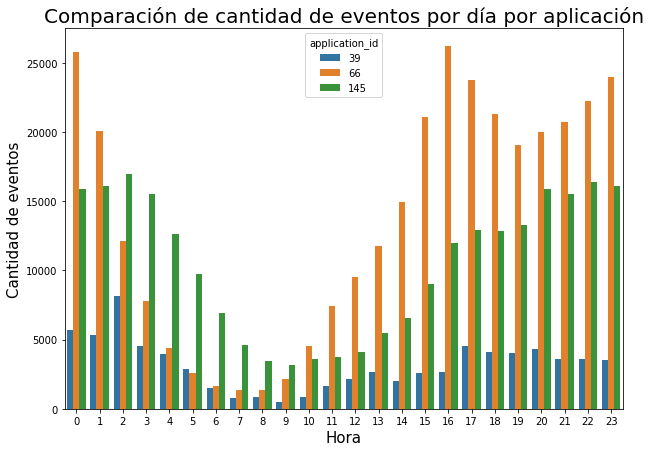

In [129]:
top20_apps = events['application_id'].value_counts().head(20).index
apps_comparation = [top20_apps[0], top20_apps[2], top20_apps[9]]
events_app = events.loc[events['application_id'].isin(apps_comparation), ['hour', 'application_id']]

plt.figure(figsize=(10,7))
graph = sns.countplot (x=events_app['hour'], hue=events_app['application_id'], data=events_app)
                      #label ="Cantidad de eventos por día para app mas usada", hist_kws={"color":"r"})
graph.set_title("Comparación de cantidad de eventos por día por aplicación", size=20)
graph.set_ylabel("Cantidad de eventos", size=15)
graph.set_xlabel("Hora", size=15)
plt.xticks(np.arange(24),np.arange(24))

plt.savefig('comp_apps_por_hora.png')

# *Eventos por día y hora*

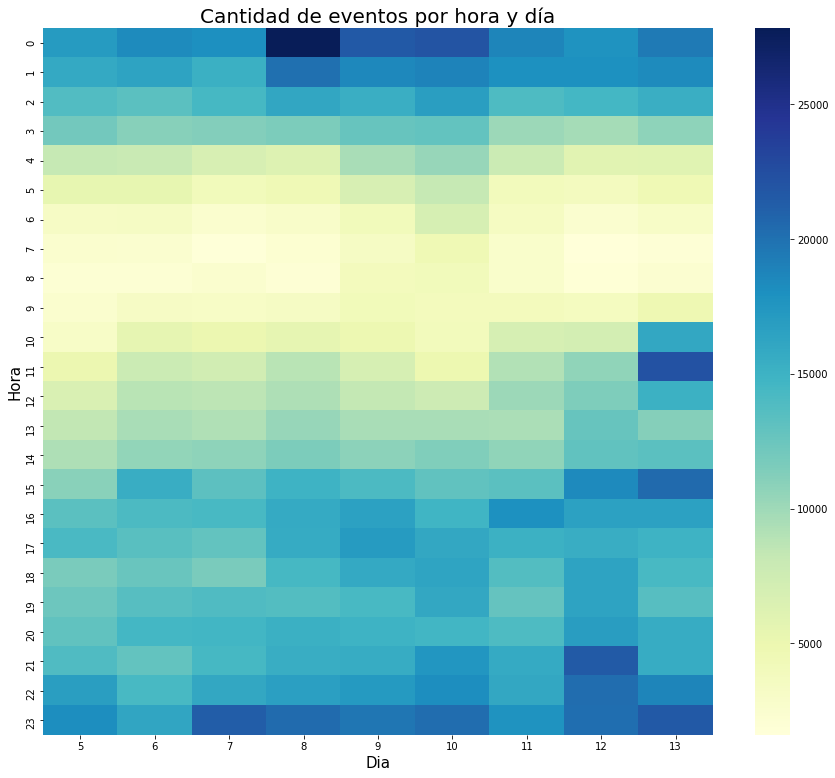

In [24]:
events_week_hour = events.loc[:,['hour', 'day']]
events_week_hour.insert(loc=2, column='cant_events', value=1)
events_week_hour = events_week_hour.pivot_table(index='hour', columns='day', values='cant_events', fill_value=0, aggfunc=np.sum)

plt.figure(figsize=(15,13))
graph = sns.heatmap(events_week_hour, cmap="YlGnBu")
graph.set_title("Cantidad de eventos por hora y día", size=20)
graph.set_ylabel("Hora", size=15)
graph.set_xlabel("Dia", size=15)

plt.savefig('cantidad_eventos_por_hora_y_dia.png')

# *Cantidad de eventos atribuidos a Jammp*

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\matplotlib\legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


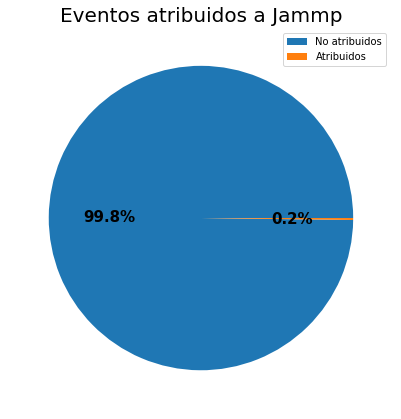

In [118]:
attributed_events = events['attributed'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
patches, texts, floatt = plt.pie(attributed_events, autopct='%1.1f%%')
ax.set_title("Eventos atribuidos a Jammp", size=20)
plt.legend(patches, labels=['No atribuidos', 'Atribuidos'], loc="best")
plt.setp(floatt, size=15, weight="bold")

plt.savefig('eventos_atribuidos.png')

# *Dispositivo mas ocurrente por hora*

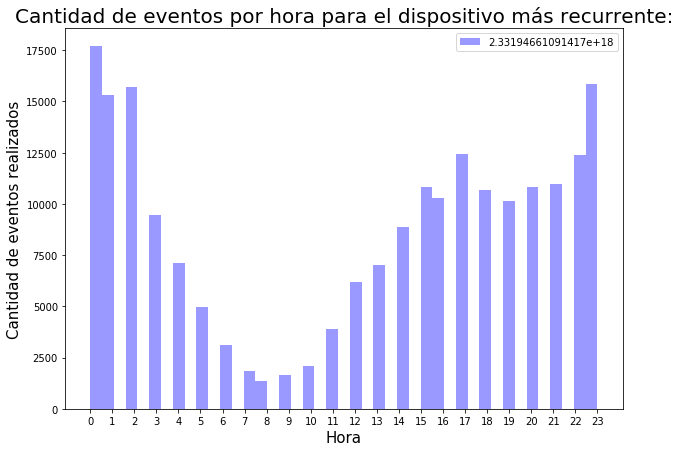

In [123]:
top_device_model = events['device_model'].value_counts().head(1).index
events_model = events.loc[events['device_model'].isin(top_device_model), ['hour']]

plt.figure(figsize=(10,7))
graph = sns.distplot (events_model['hour'], kde=False, rug=False, label = " histograma para dispositivo mas ocurrente",\
                      hist_kws={"color":"b"})
graph.set_title("Cantidad de eventos por hora para el dispositivo más recurrente:", size=20)
graph.set_ylabel("Cantidad de eventos realizados", size=15)
graph.set_xlabel("Hora", size=15)
plt.legend(labels=top_device_model, loc="best")
plt.xticks(np.arange(24),np.arange(24))

plt.savefig("top_device_por_hora.png")

# *Top 5 apps: eventos por hora*

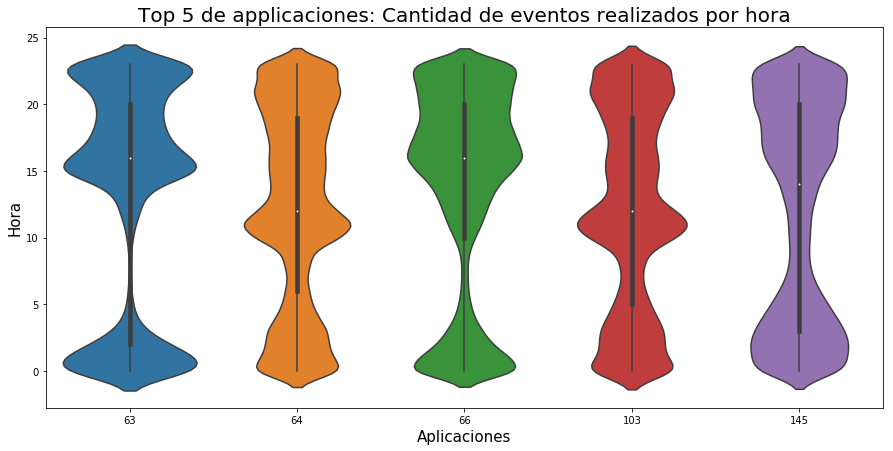

In [27]:
top_apps = events['application_id'].value_counts().head(5).index
events_apps = events.loc[events['application_id'].isin(top_apps), ['application_id', 'hour']]

plt.figure(figsize=(15,7))
graph = sns.violinplot (y=events_apps['hour'], x=events_apps['application_id'], data=events_apps)
graph.set_title("Top 5 de applicaciones: Cantidad de eventos realizados por hora", size=20)
graph.set_ylabel("Hora", size=15)
graph.set_xlabel("Aplicaciones", size=15)

plt.savefig("top5apps_eventos_por_hora")

# * Top 5 apps: eventos por hora dividido por wifi*

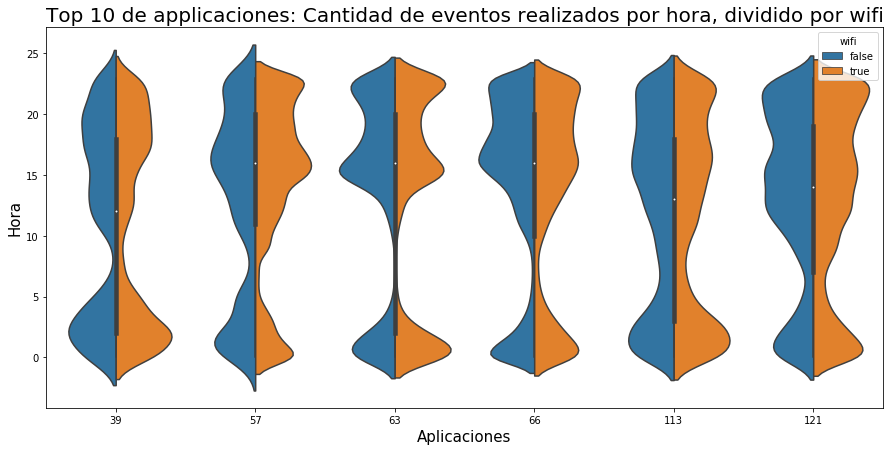

In [28]:
top_apps = events['application_id'].value_counts().head(10).index
events_apps = events.loc[events['application_id'].isin(top_apps), ['application_id', 'hour', 'wifi']]
events_apps.dropna(inplace=True)


plt.figure(figsize=(15,7))
graph = sns.violinplot (y='hour', x='application_id', hue='wifi', data=events_apps, split=True)
graph.set_title("Top 10 de applicaciones: Cantidad de eventos realizados por hora, dividido por wifi", size=20)
graph.set_ylabel("Hora", size=15)
graph.set_xlabel("Aplicaciones", size=15)

plt.savefig("top10apps_wifi")

# *Top 20 aplicaciones mas usadas*

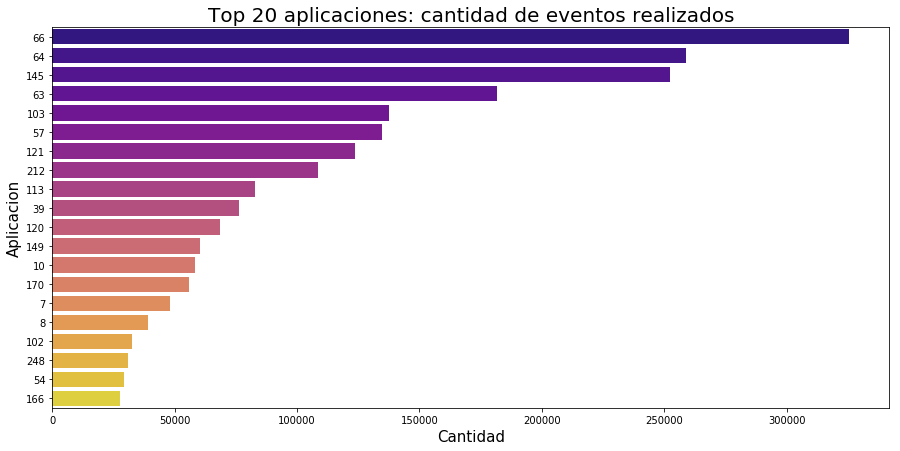

In [29]:
top_apps = events['application_id'].value_counts().head(20).index
event_apps = events.loc[events['application_id'].isin(top_apps), ['application_id']]

plt.figure(figsize=(15, 7))
g = sns.countplot(y="application_id", data=event_apps, palette="plasma", order=top_apps)
g.set_title("Top 20 aplicaciones: cantidad de eventos realizados", fontsize =20)
g.set_ylabel("Aplicacion", fontsize = 15)
g.set_xlabel("Cantidad", fontsize = 15)

plt.savefig("top10apps_cantidad_eventos.png")

# *top 5 event id*

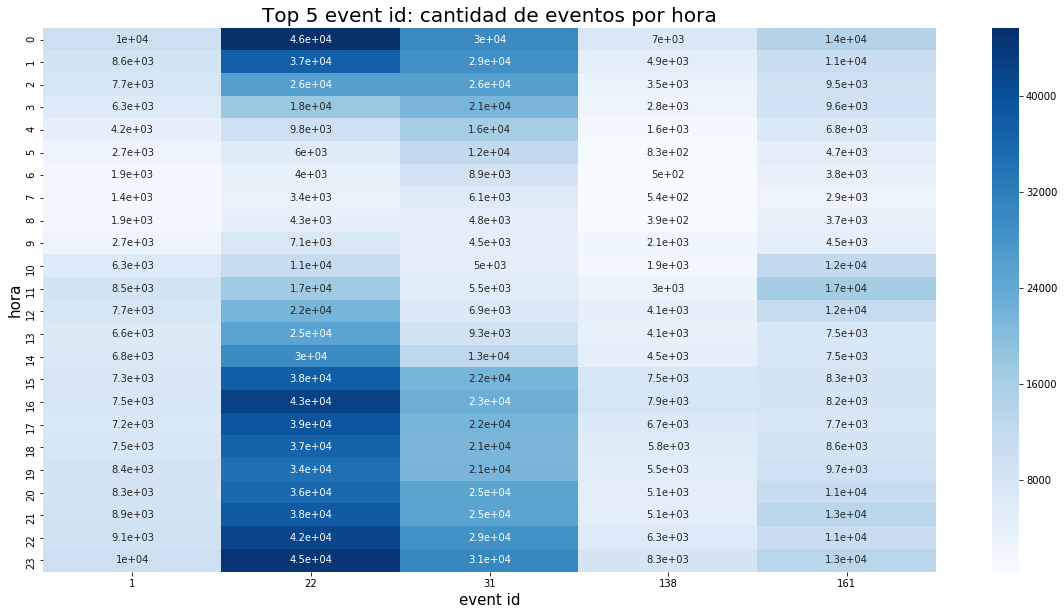

In [30]:
top5_event_id = events['event_id'].value_counts().head(5).index
top5_group = events.loc[events['event_id'].isin(top5_event_id), ['event_id', 'hour']]
event_id_hour = top5_group.groupby(['event_id', 'hour']).size().unstack()
event_id_hour = event_id_hour.fillna(0).T

plt.figure(figsize=(20, 10))
heap_map = sns.heatmap(event_id_hour, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("Top 5 event id: cantidad de eventos por hora", fontsize=20)
heap_map.set_xlabel("event id", fontsize=15)
heap_map.set_ylabel("hora", fontsize=15)

plt.savefig("top5_event_id", bbox_inches = 'tight', pad_inches = 0.1)

# *Top 5 kind*

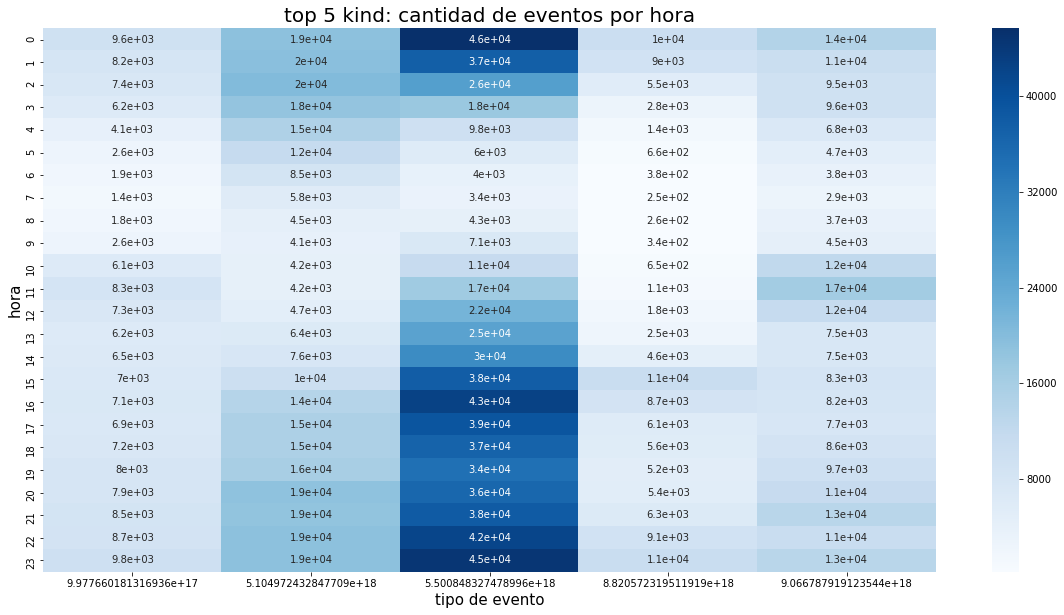

In [31]:
top5_kind = events['kind'].value_counts().head(5).index
top5_group = events.loc[events['kind'].isin(top5_kind)]
kind_hour = top5_group.groupby(['kind', 'hour']).size().unstack()
kind_hour = kind_hour.fillna(0).T

plt.figure(figsize=(20, 10))
heap_map = sns.heatmap(kind_hour, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("top 5 kind: cantidad de eventos por hora", fontsize=20)
heap_map.set_xlabel("tipo de evento", fontsize=15)
heap_map.set_ylabel("hora", fontsize=15)
plt.savefig("top5_kind", bbox_inches = 'tight', pad_inches = 0.1)

# *top 5 app: eventos por día*

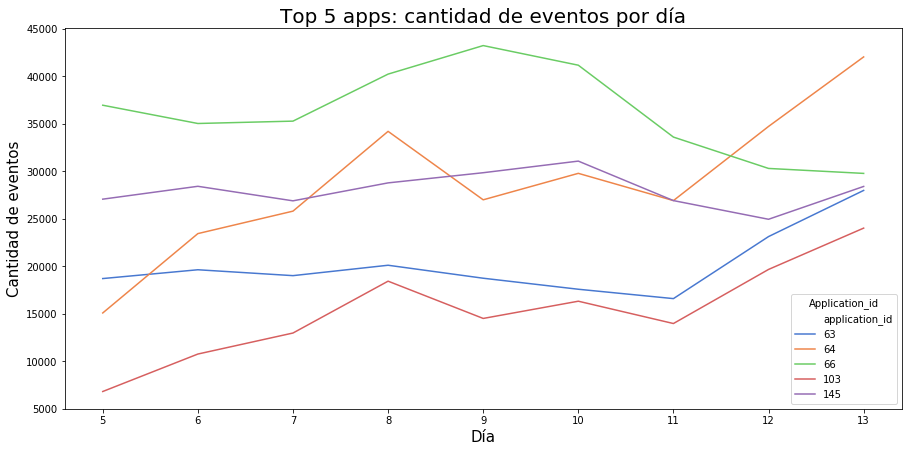

In [32]:
top5_app = events['application_id'].value_counts().head(5).index
top5_group = events.loc[events['application_id'].isin(top5_app), ['application_id', 'day']]
top5_group.insert(loc=2, column='cant', value=1)
top5_group = top5_group.groupby(['application_id', 'day']).agg('count').reset_index()
 
plt.figure(figsize=(15,7))
graph = sns.lineplot(x=top5_group['day'], y=top5_group['cant'], hue=top5_group['application_id'],\
                     data=top5_group, palette=sns.color_palette('muted', n_colors=5))
graph.set_title("Top 5 apps: cantidad de eventos por día",size=20)
graph.set_ylabel('Cantidad de eventos',size=15)
graph.set_xlabel('Día',size=15)
plt.legend(title='Application_id')

plt.savefig("top5apps_eventos_por_dia", bbox_inches = 'tight', pad_inches = 0.1)

# *Eventos por tipo de conexion*

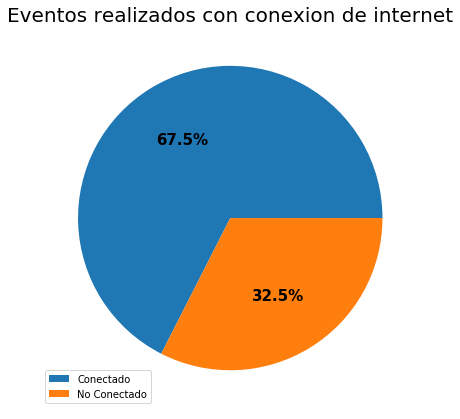

In [33]:
connection = events['wifi'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
patches, texts, floatt = plt.pie(connection, autopct='%1.1f%%')
ax.set_title("Eventos realizados con conexion de internet", size=20)
plt.legend(patches, labels=['Conectado','No Conectado'], loc="best")
plt.setp(floatt, size=15, weight="bold")

plt.savefig('eventos_con_wifi.png')

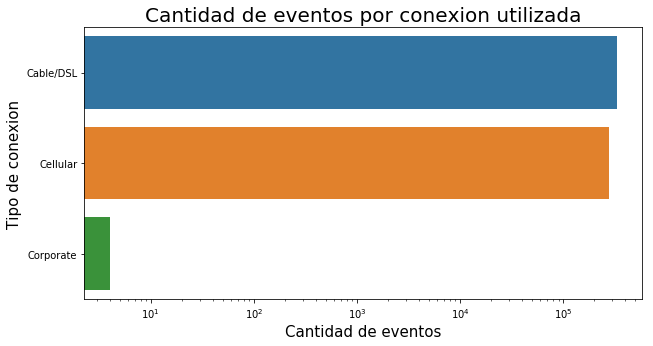

In [34]:
plt.figure(figsize=(10, 5))
graph = sns.countplot(y="connection_type", data=events, log=True)
graph.set_title("Cantidad de eventos por conexion utilizada",size=20)
graph.set_xlabel('Cantidad de eventos',size=15)
graph.set_ylabel('Tipo de conexion',size=15)
plt.savefig('eventos_por_conexion.png')

# *Top 10 usuarios*

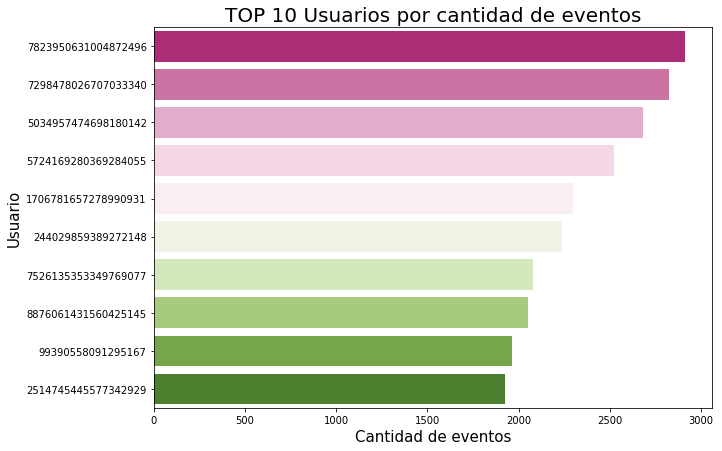

In [131]:
top_usuarios = events['ref_hash'].value_counts().head(10).index
top_group = events.loc[events['ref_hash'].isin(top_usuarios), ['ref_hash']]

plt.figure(figsize=(10, 7))
ref_hash_g = sns.countplot(y=top_group['ref_hash'], data=top_group, palette='PiYG', order=top_usuarios)
                              
ref_hash_g.set_title("TOP 10 Usuarios por cantidad de eventos", fontsize =20)
ref_hash_g.set_xlabel('Cantidad de eventos', fontsize = 15)
ref_hash_g.set_ylabel("Usuario", fontsize = 15)

plt.savefig('eventos_por_usuario.png')

# *Top 10 usuarios por wifi*

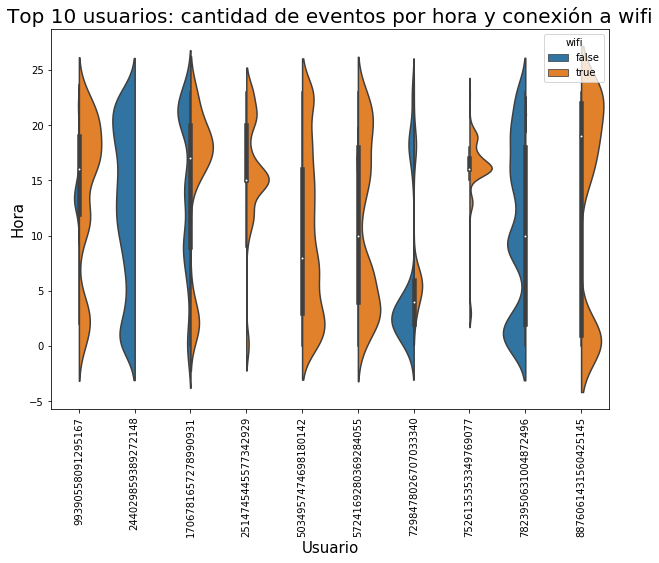

In [36]:
top_usuarios = events['ref_hash'].value_counts().head(10).index
top_group = events.loc[events['ref_hash'].isin(top_usuarios), ['ref_hash', 'wifi', 'hour']]
top_group.dropna(inplace=True)

plt.figure(figsize=(10,7))
usuarios_wifi_events_g = sns.violinplot(x='ref_hash', y='hour', hue='wifi', data=top_group, \
                                        split=True, scale="count")
usuarios_wifi_events_g.set_xticklabels(usuarios_wifi_events_g.get_xticklabels(), rotation=90)
usuarios_wifi_events_g.set_title("Top 10 usuarios: cantidad de eventos por hora y conexión a wifi",size=20)
usuarios_wifi_events_g.set_ylabel('Hora',size=15)
usuarios_wifi_events_g.set_xlabel('Usuario',size=15)
plt.savefig('eventos_por_usuario_wifi.png')

# *Top 10 device language*

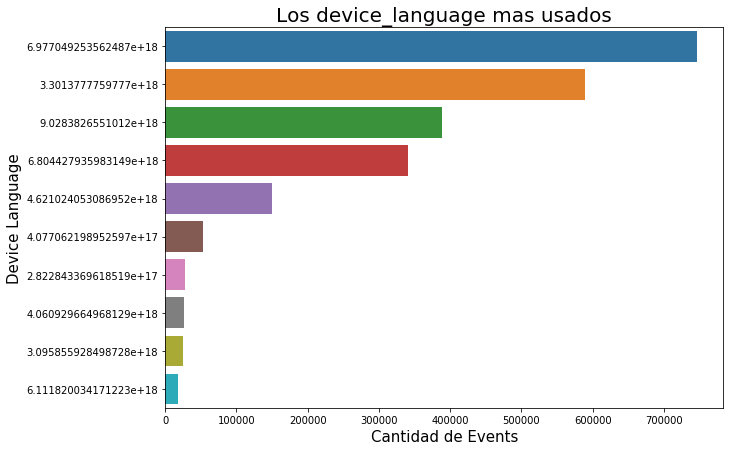

In [126]:
top_language = events['device_language'].value_counts().head(10).index
top_group_language = events.loc[events['device_language'].isin(top_language)]

plt.figure(figsize=(10, 7))
g1 =sns.countplot(y="device_language", data=top_group_language, order=top_language)
g1.set_title("Los device_language mas usados", fontsize =20)
g1.set_xlabel("Cantidad de Events", fontsize = 15)
g1.set_ylabel("Device Language", fontsize = 15)

plt.savefig('top10_languages.png')

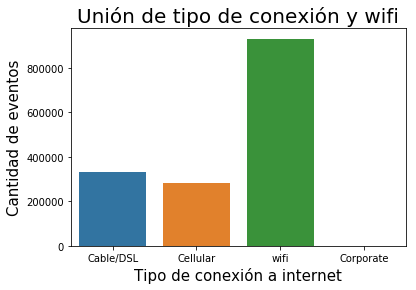

In [127]:
#Cuando connection type es nulo, se verifica que wifi o es falso o nulo.
# Suposición de que si wifi es nulo, y connection type no lo es, es porque está conectado a
# internet mediante el tipo de conexion especificado en connection type, por lo que wifi sería falso
connection.loc[events['wifi']=='true', 'connection'] = 'wifi'  
connection.loc[events['connection_type'] == 'Corporate', 'connection'] = 'Corporate' 
connection.loc[events['connection_type'] == 'Cable/DSL', 'connection'] = 'Cable/DSL'
connection.loc[events['connection_type'] == 'Cellular', 'connection'] = 'Cellular'

graph = sns.countplot(x='connection', data=connection)
graph.set_title("Unión de tipo de conexión y wifi", fontsize =20)
graph.set_xlabel("Tipo de conexión a internet", fontsize = 15)
graph.set_ylabel("Cantidad de eventos", fontsize = 15)

plt.savefig('Suposicion_conexion_internet.png', bbox_inches = 'tight', pad_inches=0.1)